# **Soal 1 : Jenis-Jenis Tepi**

Pertanyaan : Jelaskan empat jenis tepi yang biasa ditemukan dalam citra digital dan beri contoh masing-masing dalam kehidupan sehari-hari. Mengapa tepi dengan derau memerlukan pendekatan khusus untuk pendeteksian?
### Empat Jenis Tepi dalam Citra Digital  

**1. Tepi Langkah (Step Edge)**  
Tepi langkah muncul ketika ada perubahan intensitas yang tiba-tiba antara dua wilayah dalam citra. Contoh dalam kehidupan sehari-hari adalah perbatasan antara dinding putih dan pintu hitam. Tepi ini sering terlihat jelas dan memiliki kontras yang tinggi, sehingga relatif mudah dideteksi.  

**2. Tepi Garis (Line Edge)**  
Tepi garis terbentuk ketika terdapat perubahan intensitas sepanjang jalur tipis, seperti garis terang di atas latar gelap atau sebaliknya. Contoh dalam kehidupan sehari-hari adalah kabel listrik yang terlihat melintang di langit. Tepi jenis ini biasanya berbentuk tipis dan panjang.  

**3. Tepi Sudut (Corner Edge)**  
Tepi sudut terbentuk pada titik di mana dua tepi bertemu, sering kali menciptakan sudut tajam. Contohnya adalah pojok sebuah meja atau sudut bangunan pada foto arsitektur. Tepi ini penting dalam mendeteksi fitur geometris pada citra.  

**4. Tepi Derau (Noisy Edge)**  
Tepi dengan derau disebabkan oleh gangguan atau fluktuasi intensitas kecil yang sering kali menyerupai tepi nyata. Contoh dalam kehidupan sehari-hari adalah gambar buram karena pencahayaan rendah atau foto yang memiliki banyak bintik akibat gangguan sinyal.  

### Mengapa Tepi dengan Derau Memerlukan Pendekatan Khusus?  
Tepi dengan derau sulit dideteksi karena gangguan pada intensitas dapat menutupi tepi asli atau menghasilkan tepi palsu. Oleh karena itu, pendekatan khusus seperti penggunaan filter reduksi derau (misalnya Gaussian) diperlukan untuk meningkatkan akurasi. Pendekatan ini membantu memastikan hanya tepi yang relevan yang terdeteksi, sehingga analisis citra lebih konsisten dan efisien meskipun gambar memiliki kualitas yang rendah.


# **Soal 2 : Pendeteksian Tepi Menggunakan Operator Gradien**

Pertanyaan : Operator Sobel dan Prewitt digunakan untuk pendeteksian tepi. Berikan contoh implementasi salah satu operator ini dalam Python menggunakan pustaka seperti NumPy atau OpenCV. Jelaskan langkah-langkahnya secara rinci.

### Implementasi Operator Sobel dalam Python  

Operator Sobel digunakan untuk mendeteksi tepi dengan menghitung perubahan intensitas dalam arah horizontal (X) dan vertikal (Y). Implementasinya diawali dengan mengimpor pustaka seperti OpenCV untuk memproses gambar. Gambar yang digunakan sebagai input dibaca menggunakan fungsi `cv2.imread()` dan diubah menjadi skala abu-abu untuk menyederhanakan proses pengolahan.  

Langkah berikutnya adalah mengurangi derau pada gambar menggunakan filter Gaussian Blur dengan fungsi `cv2.GaussianBlur()`. Tahap ini opsional tetapi sangat disarankan untuk memastikan bahwa hasil deteksi tepi tidak terganggu oleh fluktuasi kecil akibat derau. Setelah itu, gradien pada arah horizontal dihitung dengan `cv2.Sobel()` menggunakan parameter yang mengindikasikan arah X, sementara gradien vertikal dihitung dengan cara serupa tetapi untuk arah Y.  

Untuk memperoleh hasil deteksi tepi yang lebih menyeluruh, gradien horizontal dan vertikal digabungkan menggunakan fungsi `cv2.magnitude()`. Fungsi ini menghitung magnitudo gradien sehingga menghasilkan informasi lengkap mengenai keberadaan tepi dalam gambar. Hasil akhir biasanya dinormalisasi agar nilai piksel berada dalam rentang yang sesuai untuk ditampilkan atau disimpan.  

Hasil dari implementasi ini dapat divisualisasikan, misalnya menggunakan Matplotlib, untuk membandingkan gambar asli dengan hasil deteksi tepi dalam arah horizontal, vertikal, dan gabungannya. Operator Sobel sangat cocok digunakan untuk mendeteksi tepi pada gambar dengan kontras tinggi, memberikan hasil yang tajam dan informatif.

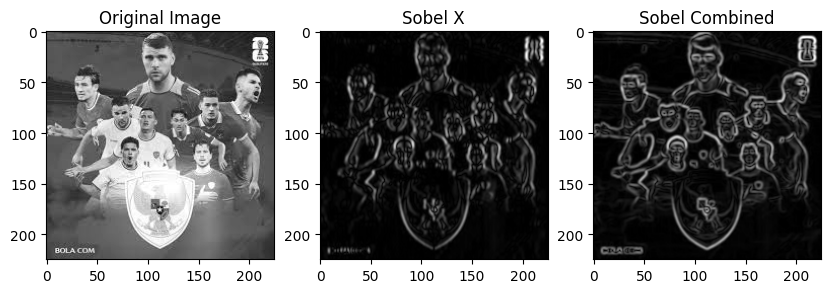

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca Gambar dan Ubah ke Skala Abu-abu
image = cv2.imread('/content/timnas.jpg', cv2.IMREAD_GRAYSCALE)

# 2. Aplikasikan Gaussian Blur untuk Mengurangi Derau
blurred = cv2.GaussianBlur(image, (5, 5), 0)

# 3. Hitung Gradien Menggunakan Operator Sobel
sobel_x = cv2.Sobel(blurred, cv2.CV_64F, 1, 0, ksize=3)  # Gradien Horizontal
sobel_y = cv2.Sobel(blurred, cv2.CV_64F, 0, 1, ksize=3)  # Gradien Vertikal

# 4. Hitung Magnitudo Gradien (Gabungkan X dan Y)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# 5. Normalisasi Hasil untuk Ditampilkan
sobel_combined = np.uint8(255 * sobel_combined / np.max(sobel_combined))

# 6. Tampilkan Hasil
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(image, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Sobel X')
plt.imshow(np.abs(sobel_x), cmap='gray')

plt.subplot(1, 3, 3)
plt.title('Sobel Combined')
plt.imshow(sobel_combined, cmap='gray')

plt.show()


# **Soal 3 : Perbandingan Operator Pendeteksi Tepi**

Pertanyaan : Berikan perbandingan antara operator Sobel, Prewitt, dan Canny berdasarkan akurasi dan kompleksitas komputasi. Dalam situasi apa operator Canny lebih direkomendasikan?

Operator Sobel, Prewitt, dan Canny memiliki perbedaan dalam hal akurasi dan kompleksitas komputasi. **Sobel** dikenal sebagai operator yang memiliki akurasi moderat, cukup baik untuk mendeteksi tepi dengan perubahan intensitas tajam. Operator ini menggunakan kernel untuk menghitung gradien horizontal dan vertikal, sehingga menghasilkan deteksi tepi yang relatif tajam. Kompleksitasnya rendah hingga sedang, membuatnya cocok untuk aplikasi yang tidak membutuhkan akurasi tinggi atau saat sumber daya komputasi terbatas.  

**Prewitt**, di sisi lain, adalah varian yang lebih sederhana dibandingkan Sobel. Meskipun prosesnya serupa, Prewitt cenderung memberikan akurasi yang sedikit lebih rendah dan lebih rentan terhadap derau karena tidak memiliki pengaturan bobot tambahan seperti Sobel. Kompleksitas komputasinya lebih rendah, menjadikannya pilihan yang cepat dan ringan, tetapi kurang ideal untuk aplikasi yang membutuhkan hasil deteksi tepi yang presisi.  

Berbeda dengan keduanya, **Canny** adalah operator yang jauh lebih canggih. Operator ini melibatkan beberapa langkah, seperti penerapan Gaussian Blur untuk mengurangi derau, perhitungan gradien untuk deteksi tepi, non-maximum suppression untuk menghilangkan respon palsu, dan dual-thresholding untuk memilih tepi yang signifikan. Proses ini memberikan hasil deteksi yang sangat akurat, bahkan untuk tepi yang halus atau di lingkungan dengan banyak derau. Namun, kompleksitas komputasi Canny jauh lebih tinggi dibandingkan Sobel dan Prewitt.  

Operator Canny lebih direkomendasikan dalam situasi yang membutuhkan akurasi tinggi dan toleransi terhadap derau. Misalnya, pada pengolahan citra medis untuk mendeteksi struktur halus seperti pembuluh darah atau batas tumor, Canny mampu memberikan hasil yang signifikan dan konsisten. Selain itu, dalam aplikasi pengenalan objek atau navigasi pada kendaraan otonom, akurasi Canny membantu mendeteksi tepi yang penting untuk segmentasi atau pelacakan objek. Dengan fitur bawaan untuk reduksi derau dan pemilihan tepi yang signifikan, Canny unggul dalam gambar yang kompleks atau memiliki banyak gangguan, meskipun membutuhkan lebih banyak sumber daya komputasi.

# **Soal 4 : Pendeteksian Tepi pada Citra Noisy**

Pertanyaan : Sebuah citra memiliki derau "salt-and-pepper". Implementasikan kode Python untuk mendeteksi tepi menggunakan metode Canny dan Sobel setelah melakukan image smoothing menggunakan Gaussian filter. Bandingkan hasilnya dengan citra asli.

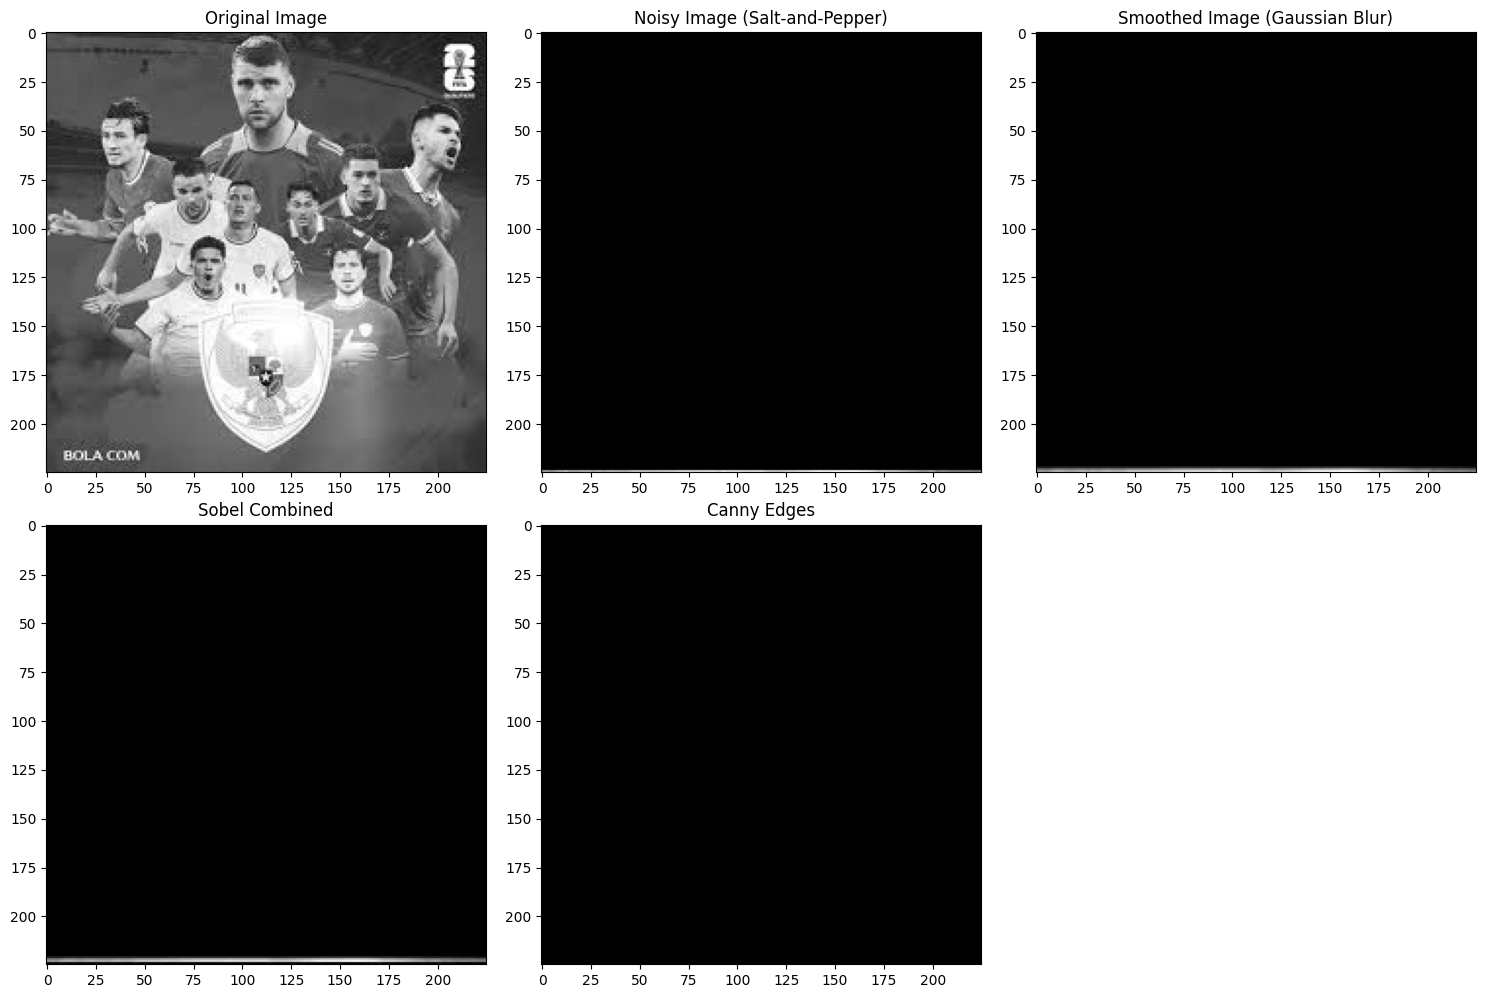

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Membuat atau Membaca Citra dengan Derau Salt-and-Pepper
def add_salt_and_pepper_noise(image, prob):
    noisy_image = np.copy(image)
    total_pixels = image.size
    num_salt = int(prob * total_pixels / 2)
    num_pepper = int(prob * total_pixels / 2)

    # Tambahkan noise "salt"
    coords_salt = [np.random.randint(0, i - 1, num_salt) for i in image.shape]
    noisy_image[coords_salt] = 255

    # Tambahkan noise "pepper"
    coords_pepper = [np.random.randint(0, i - 1, num_pepper) for i in image.shape]
    noisy_image[coords_pepper] = 0

    return noisy_image

# Baca citra
image = cv2.imread('/content/timnas.jpg', cv2.IMREAD_GRAYSCALE)

# Tambahkan derau salt-and-pepper
noisy_image = add_salt_and_pepper_noise(image, prob=0.05)

# 2. Aplikasikan Gaussian Filter untuk Image Smoothing
smoothed_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

# 3. Deteksi Tepi dengan Sobel
sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined = cv2.magnitude(sobel_x, sobel_y)

# 4. Deteksi Tepi dengan Canny
canny_edges = cv2.Canny(smoothed_image, 50, 150)

# 5. Tampilkan Hasil Perbandingan
plt.figure(figsize=(15, 10))

# Gambar asli
plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')

# Gambar dengan derau
plt.subplot(2, 3, 2)
plt.title("Noisy Image (Salt-and-Pepper)")
plt.imshow(noisy_image, cmap='gray')

# Gambar setelah smoothing
plt.subplot(2, 3, 3)
plt.title("Smoothed Image (Gaussian Blur)")
plt.imshow(smoothed_image, cmap='gray')

# Hasil Sobel
plt.subplot(2, 3, 4)
plt.title("Sobel Combined")
plt.imshow(sobel_combined, cmap='gray')

# Hasil Canny
plt.subplot(2, 3, 5)
plt.title("Canny Edges")
plt.imshow(canny_edges, cmap='gray')

plt.tight_layout()
plt.show()


Penjelasan Langkah Kode
Penambahan Derau Salt-and-Pepper
Fungsi add_salt_and_pepper_noise() menambahkan piksel acak bernilai 0 (pepper) dan 255 (salt) pada citra untuk mensimulasikan derau salt-and-pepper.

Gaussian Filter untuk Smoothing
Derau dikurangi menggunakan Gaussian Blur, yang menerapkan kernel Gaussian pada citra untuk meratakan perubahan intensitas.

Deteksi Tepi dengan Sobel
Gradien horizontal dan vertikal dihitung menggunakan cv2.Sobel(), lalu digabungkan untuk menghasilkan citra tepi.

Deteksi Tepi dengan Canny
Fungsi cv2.Canny() digunakan untuk mendeteksi tepi dengan langkah-langkah seperti reduksi derau, perhitungan gradien, dan thresholding.

Visualisasi Hasil
Citra asli, citra dengan derau, citra yang telah dihaluskan, serta hasil deteksi tepi dengan Sobel dan Canny dibandingkan dalam satu grid.

Analisis Hasil
Citra Asli vs. Noisy: Derau salt-and-pepper terlihat sebagai bintik hitam dan putih acak.
Setelah Smoothing: Gaussian filter efektif mengurangi derau tanpa kehilangan terlalu banyak detail.
Sobel vs. Canny:
Sobel mendeteksi tepi horizontal dan vertikal secara langsung, tetapi lebih rentan terhadap derau kecil.
Canny menghasilkan tepi yang lebih halus dan signifikan karena proses reduksi derau terintegrasi dan thresholding ganda.
Rekomendasi: Canny lebih cocok jika dibutuhkan hasil tepi yang lebih akurat dalam kondisi citra dengan derau.